# Lecture 3) Part 2 - Meta Parameters

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn as sl

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
from sklearn import linear_model

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor


%matplotlib inline
import scipy as sc
import math as ma
from scipy import linalg, optimize, constants, interpolate, special, stats
from math import exp, pow, sqrt, log

import seaborn as sns #spezielle Graphikdarstellungen
import statsmodels.api as sm
import statsmodels.stats.api as sms

#import theano 
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import InputLayer,Dense, Activation
from keras.optimizers import SGD #Stochastic Gradient Descent
from keras.utils import to_categorical  
from keras.utils import plot_model


In [2]:
# updatable plot

from IPython.display import clear_output
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

First we load and prepare the data from the last tutorial

In [3]:
Housing = pd.read_csv("../Data/housing.csv")
Housing.head()

Housing_new=Housing.drop(columns=['total_bedrooms','ocean_proximity'])
Housing_new.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0


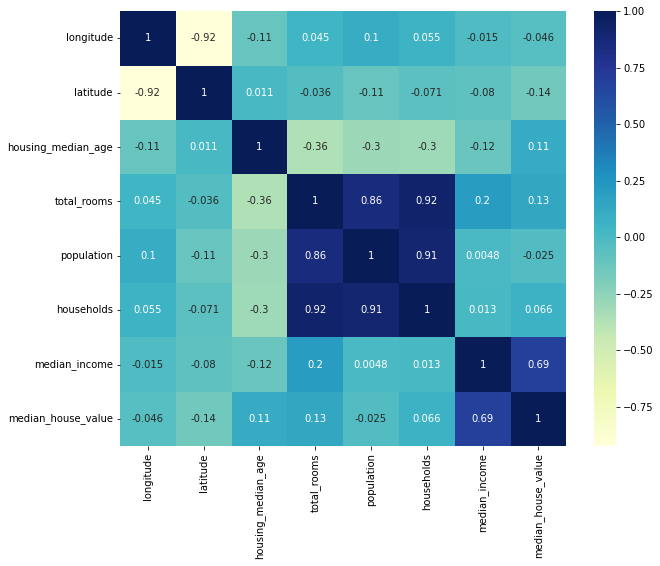

In [4]:
# Plot the correlation-Heatmap
fig = plt.figure(figsize=(10, 8));
sns.heatmap(Housing_new.corr(), cmap="YlGnBu", annot=True);
  
#plt.show()

In [5]:
X_housing=Housing[['longitude','latitude','housing_median_age','total_rooms','population','households','median_income']]
y_housing=Housing['median_house_value']

# Split the data into train and test sets
X_housing_train, X_housing_test, y_housing_train, y_housing_test = train_test_split(X_housing, y_housing, test_size=0.3, random_state=42)

# Standardize the features
Xscaler = StandardScaler()
X_housing_train = Xscaler.fit_transform(X_housing_train)
X_housing_test = Xscaler.transform(X_housing_test)

In [6]:
# Standardize the target
Yscaler = StandardScaler()
y_housing_train_sc = Yscaler.fit_transform(np.array(y_housing_train).reshape(-1,1))
y_housing_test_sc = Yscaler.transform(np.array(y_housing_test).reshape(-1,1))

print(X_housing_train.shape)
print(X_housing_test.shape)

print(y_housing_train_sc.shape)
print(y_housing_test_sc.shape)

(14448, 7)
(6192, 7)
(14448, 1)
(6192, 1)


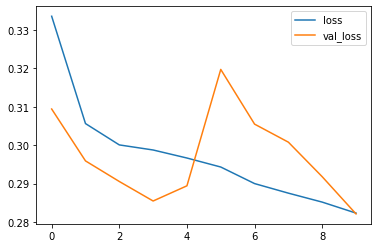

In [7]:
tf.random.set_seed(42)

NNRegModel1=Sequential()

NNRegModel1.add(InputLayer(input_shape=(7,))) # Input shape = 7 features
NNRegModel1.add(Dense(5,activation='tanh',use_bias=True))
NNRegModel1.add(Dense(1,use_bias=True))

sgd = SGD(learning_rate=0.3)
NNRegModel1.compile(loss='mean_squared_error', optimizer='sgd')

NNRegModel1.fit(X_housing_train, y_housing_train_sc,
          shuffle=True,
          epochs=10,
          batch_size=1,
          verbose=0,
          validation_data=(X_housing_test, y_housing_test_sc),                  
          callbacks=[plot_losses]);

In [8]:
y_pred_train_sc = NNRegModel1.predict(X_housing_train)
y_pred_test_sc = NNRegModel1.predict(X_housing_test)

194/194 [==============================] - 0s 660us/step


In [9]:
# Inverse transform to get the predicted values back to the original scale
y_pred_train_original = Yscaler.inverse_transform(y_pred_train_sc)
y_pred_test_original = Yscaler.inverse_transform(y_pred_test_sc)

r2_train=r2_score(y_pred_train_original,np.array(y_housing_train))
r2_test=r2_score(y_pred_test_original,np.array(y_housing_test))

rmse_train=np.sqrt(mean_squared_error(y_pred_train_original,np.array(y_housing_train)))
rmse_test=np.sqrt(mean_squared_error(y_pred_test_original,np.array(y_housing_test)))

rmse_perc_train=rmse_train/np.mean(np.array(y_housing_train))
rmse_perc_test=rmse_test/np.mean(np.array(y_housing_test))

print(r2_train, r2_test)
print(rmse_train, rmse_test)
print(rmse_perc_train, rmse_perc_test)

0.6416546404182008 0.6379180623079321
61314.01658484018 61477.06945424124
0.29631182546412643 0.29742630368752127


### Exercise 1) Optimizers, Learning-Rate Schedules & Loss Functions

Compare optimizers (SGD, SGD+Momentum, Adam, RMSprop), try different learning-rate schedules, and test multiple loss functions (MSE, MAE,...). Keep all other settings fixed.


- Train with SGD, SGD (momentum=0.9), Adam, RMSprop at the same initial LR (e.g., 1e-3), record validation MAE/MSE and time per epoch.

- Add a learning-rate schedule: ReduceLROnPlateau or a decay schedule (Cosine/Exponential).

- Switch loss between "mse", "mae", ... and compare.

Hint:

----- choose optimizer -----
opt_sgd        = tf.keras.optimizers.SGD(learning_rate=1e-3)

opt_sgd_mom    = tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9)

opt_adam       = tf.keras.optimizers.Adam(learning_rate=1e-3)

opt_rmsprop    = tf.keras.optimizers.RMSprop(learning_rate=1e-3)


----- optional learning-rate schedules -----

cosine_lr = tf.keras.optimizers.schedules.CosineDecay(initial_learning_rate=1e-3, decay_steps=2000, alpha=1e-2
)

opt_adam_cosine = tf.keras.optimizers.Adam(learning_rate=cosine_lr)


exp_lr = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3, decay_steps=1000, decay_rate=0.96, staircase=True)
    
opt_adam_exp = tf.keras.optimizers.Adam(learning_rate=exp_lr)

----- loss options -----

loss_mse   = "mse"

loss_mae   = "mae"



In [ ]:
# Exercise 1) Optimizers, LR Schedules & Loss

import time
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers.schedules import CosineDecay, ExponentialDecay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense

# Rebuild a small baseline model factory

def build_baseline_model(activation="tanh"):
    model = Sequential([
        InputLayer(input_shape=(7,)),
        Dense(5, activation=activation, use_bias=True),
        Dense(1, use_bias=True)
    ])
    return model

# Common training config
EPOCHS = 30
BATCH_SIZE = 32
VERBOSE = 0

# Define optimizers (fixed initial LR)
opt_sgd      = SGD(learning_rate=1e-3)
opt_sgd_mom  = SGD(learning_rate=1e-3, momentum=0.9)
opt_adam     = Adam(learning_rate=1e-3)
opt_rmsprop  = RMSprop(learning_rate=1e-3)

optimizers = {
    "SGD": opt_sgd,
    "SGD+Momentum": opt_sgd_mom,
    "Adam": opt_adam,
    "RMSprop": opt_rmsprop,
}

# Optional schedules
cosine_lr = CosineDecay(initial_learning_rate=1e-3, decay_steps=2000, alpha=1e-2)
exp_lr    = ExponentialDecay(initial_learning_rate=1e-3, decay_steps=1000, decay_rate=0.96, staircase=True)

opt_adam_cosine = Adam(learning_rate=cosine_lr)
opt_adam_exp    = Adam(learning_rate=exp_lr)

schedules = {
    "Adam+Cosine": opt_adam_cosine,
    "Adam+ExpDecay": opt_adam_exp,
}

results = []

# Helper: train once and record metrics/time

def train_and_eval(optimizer, use_reduce_on_plateau=False):
    model = build_baseline_model(activation="tanh")
    model.compile(loss="mse", optimizer=optimizer, metrics=["mae"])  # default loss=mse

    callbacks = []
    if use_reduce_on_plateau:
        callbacks.append(ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-5, verbose=0))

    t0 = time.time()
    hist = model.fit(
        X_housing_train, y_housing_train_sc,
        validation_data=(X_housing_test, y_housing_test_sc),
        epochs=EPOCHS, batch_size=BATCH_SIZE, shuffle=True, verbose=VERBOSE,
        callbacks=callbacks
    )
    dur = time.time() - t0

    val_mae  = float(np.min(hist.history["val_mae"]))
    val_loss = float(np.min(hist.history["val_loss"]))

    return dur, val_mae, val_loss

# Run baseline optimizers
for name, opt in optimizers.items():
    dur, vmae, vloss = train_and_eval(opt)
    results.append({"setup": name, "time_s": dur, "best_val_mae": vmae, "best_val_loss": vloss})

# Run schedulers
for name, opt in schedules.items():
    dur, vmae, vloss = train_and_eval(opt, use_reduce_on_plateau=False)
    results.append({"setup": name, "time_s": dur, "best_val_mae": vmae, "best_val_loss": vloss})

# Adam + ReduceLROnPlateau as an extra
adam_rlrop = Adam(learning_rate=1e-3)
dur, vmae, vloss = train_and_eval(adam_rlrop, use_reduce_on_plateau=True)
results.append({"setup": "Adam+ReduceLROnPlateau", "time_s": dur, "best_val_mae": vmae, "best_val_loss": vloss})

# Display results
res_df = pd.DataFrame(results).sort_values(by="best_val_mae")
print(res_df)


### Example: code from before with scheduler

```python
### --- build the same model as before ---
NNRegModel1 = Sequential()
NNRegModel1.add(InputLayer(input_shape=(7,)))           # Input shape = 7 features
NNRegModel1.add(Dense(5, activation='tanh', use_bias=True))
NNRegModel1.add(Dense(1, use_bias=True))

### --- define the optimizer ---
sgd = SGD(learning_rate=0.3)

### --- compile the model ---
NNRegModel1.compile(loss='mean_squared_error', optimizer=sgd, metrics=['mae'])

### --- Option A: ReduceLROnPlateau ---
### lowers the learning rate if the validation loss does not improve
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',    # metric to watch
    factor=0.5,            # reduce LR by half
    patience=3,            # wait 3 epochs without improvement
    min_lr=1e-4,           # lower limit for LR
    verbose=1
)

### --- train the model with LR scheduler callback ---
history = NNRegModel1.fit(
    X_housing_train, y_housing_train_sc,
    shuffle=True,
    epochs=30,
    batch_size=1,
    verbose=1,
    validation_data=(X_housing_test, y_housing_test_sc),
    callbacks=[reduce_lr, plot_losses]   # plot_losses can stay in
)
```

In [ ]:
# Exercise 3 & 4) Activations and Initializer Magnitude

from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.optimizers import Adam

# Compare activations: tanh, relu, leakyrelu
ACTIVATIONS = [
    ("tanh", None),                # built-in
    ("relu", None),                # built-in
    ("leakyrelu", 0.1),            # custom with alpha
]

# Compare initializer stddevs
INIT_STDDEVS = [0.01, 0.1, 1.0]

EPOCHS = 40
BATCH_SIZE = 32
VERBOSE = 0

results = []

# Helper to build model with activation and initializer scale

def build_model(activation_name="tanh", alpha=None, stddev=0.1):
    # Hidden layer with requested initializer magnitude
    kernel_init = RandomNormal(mean=0.0, stddev=stddev)
    if activation_name == "leakyrelu":
        model = Sequential([
            InputLayer(input_shape=(7,)),
            Dense(5, use_bias=True, kernel_initializer=kernel_init),
            LeakyReLU(alpha=alpha),
            Dense(1, use_bias=True)
        ])
    else:
        model = Sequential([
            InputLayer(input_shape=(7,)),
            Dense(5, activation=activation_name, use_bias=True, kernel_initializer=kernel_init),
            Dense(1, use_bias=True)
        ])
    return model

optimizer = Adam(learning_rate=1e-3)

# Grid over activations and initializer stddevs
for act_name, alpha in ACTIVATIONS:
    for sd in INIT_STDDEVS:
        model = build_model(activation_name=act_name, alpha=alpha, stddev=sd)
        model.compile(loss="mse", optimizer=optimizer, metrics=["mae"]) 
        hist = model.fit(
            X_housing_train, y_housing_train_sc,
            validation_data=(X_housing_test, y_housing_test_sc),
            epochs=EPOCHS, batch_size=BATCH_SIZE, shuffle=True, verbose=VERBOSE
        )
        best_val_mae  = float(np.min(hist.history["val_mae"]))
        best_val_loss = float(np.min(hist.history["val_loss"]))
        results.append({
            "activation": act_name,
            "initializer_stddev": sd,
            "best_val_mae": best_val_mae,
            "best_val_loss": best_val_loss,
            "epochs_ran": len(hist.history["loss"]) 
        })

results_df = pd.DataFrame(results).sort_values(["best_val_mae", "best_val_loss"]) 
print(results_df)


### Exercise 2) Early Stopping

Prevent overfitting and unnecessary training by stopping when the validation performance no longer improves.

- Train the same model *with* and *without* EarlyStopping.
- Use `restore_best_weights=True` to keep the weights from the best validation epoch.
- Compare:
  - Validation MAE and loss
  - Number of epochs trained
  - Overall training time

**Hint:** Start with the same network and optimizer setup as before.

```python

### --- reproducibility ---
tf.random.set_seed(42)

### --- define model (same as before) ---
NNRegModel2 = Sequential()
NNRegModel2.add(InputLayer(input_shape=(7,)))
NNRegModel2.add(Dense(5, activation='tanh', use_bias=True))
NNRegModel2.add(Dense(1, use_bias=True))

### --- optimizer ---
sgd = SGD(learning_rate=0.3)

### --- compile ---
NNRegModel2.compile(loss='mean_squared_error', optimizer=sgd, metrics=['mae'])

### --- define EarlyStopping ---
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,                 # stop after 5 epochs without improvement
    restore_best_weights=True,  # keep best model
    verbose=1
)

### --- fit model with callback ---
history = NNRegModel2.fit(
    X_housing_train, y_housing_train_sc,
    shuffle=True,
    epochs=300,                 # use higher max epochs to observe effect
    batch_size=1,
    verbose=1,
    validation_data=(X_housing_test, y_housing_test_sc),
    callbacks=[early_stop, plot_losses]
)
```
Analyze:

- The epoch at which training stopped
- The best validation loss/MAE
- Comparison to the fixed-epoch run (e.g., 100 epochs without EarlyStopping)

In [ ]:
# Exercise 2) Early Stopping vs Fixed Epochs

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD

# Common config
EPOCHS_FIXED = 100
EPOCHS_MAX   = 300
BATCH_SIZE   = 32
VERBOSE      = 0

# Build model helper (same architecture)

def build_model_es(activation="tanh"):
    m = Sequential([
        InputLayer(input_shape=(7,)),
        Dense(5, activation=activation, use_bias=True),
        Dense(1, use_bias=True)
    ])
    return m

# Optimizer
sgd = SGD(learning_rate=0.3)

# 1) Train without EarlyStopping (fixed epochs)
model_fixed = build_model_es()
model_fixed.compile(loss="mse", optimizer=sgd, metrics=["mae"]) 
hist_fixed = model_fixed.fit(
    X_housing_train, y_housing_train_sc,
    validation_data=(X_housing_test, y_housing_test_sc),
    epochs=EPOCHS_FIXED, batch_size=BATCH_SIZE, shuffle=True, verbose=VERBOSE
)

best_fixed_val_mae  = float(np.min(hist_fixed.history["val_mae"]))
best_fixed_val_loss = float(np.min(hist_fixed.history["val_loss"]))

# 2) Train with EarlyStopping
model_es = build_model_es()
model_es.compile(loss="mse", optimizer=sgd, metrics=["mae"]) 

early_stop = EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True, verbose=0
)

hist_es = model_es.fit(
    X_housing_train, y_housing_train_sc,
    validation_data=(X_housing_test, y_housing_test_sc),
    epochs=EPOCHS_MAX, batch_size=BATCH_SIZE, shuffle=True, verbose=VERBOSE,
    callbacks=[early_stop]
)

best_es_val_mae  = float(np.min(hist_es.history["val_mae"]))
best_es_val_loss = float(np.min(hist_es.history["val_loss"]))

stopped_epoch = len(hist_es.history["loss"])  # epochs actually run

print({
    "fixed_epochs_best_val_mae": best_fixed_val_mae,
    "fixed_epochs_best_val_loss": best_fixed_val_loss,
    "early_stop_best_val_mae": best_es_val_mae,
    "early_stop_best_val_loss": best_es_val_loss,
    "early_stop_epochs_ran": stopped_epoch
})


### Exercise 3) Activation Functions

Examine how different activation functions affect convergence speed, stability, and final validation performance.

- Keep the data, train/val split, optimizer, batch size, and max epochs fixed.
- Compare networks using **tanh**, **ReLU**, **LeakyReLU(α=0.1)**,...in the hidden layer(s).
- Record: best validation MAE/loss, epochs to best model, and any instability (oscillations, plateaus).

**Hint:** Very high learning rates can make some activations unstable; if training diverges, try smaller LR (e.g., 0.1 → 0.03 → 0.01).

```python

# --- ReLU
Dense(5, activation='relu', use_bias=True)

# --- LeakyReLU
Dense(5, use_bias=True),LeakyReLU(alpha=0.1)
```

### Exercise 4) Effect of Initial Weight Magnitude

Study how the *size* of the initial weights (i.e., their standard deviation) affects training speed, stability, and final performance.

- Keep the same model architecture, optimizer, and learning rate.
- Use a normal or uniform initializer, but vary the **scale** of the weights (e.g., standard deviation `stddev = 0.01`, `0.1`, `1.0`).
- Observe:
  - How quickly the model starts to learn
  - Whether the loss diverges or plateaus
  - Final validation MAE/loss

```python
from tensorflow.keras.initializers import RandomNormal, RandomUniform
from tensorflow.keras.layers import Dense

# --- very small initial weights ---
Dense(5, activation='tanh', kernel_initializer=RandomNormal(mean=0.0, stddev=0.01), use_bias=True)

# --- medium initial weights ---
Dense(5, activation='tanh', kernel_initializer=RandomNormal(mean=0.0, stddev=0.1), use_bias=True)

# --- large initial weights (risk of exploding activations) ---
Dense(5, activation='tanh', kernel_initializer=RandomNormal(mean=0.0, stddev=1.0), use_bias=True)
```

Report:

- Training curves and validation metrics for each initialization scale

- Any signs of exploding or vanishing gradients

- which weight scale yields stable and efficient learning for this network?